In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

from evaluation.help_functions.prepare_data import most_recent_thursday
from dax.help_functions.calculate_returns import calculate_returns


def get_data():

    msft = yf.Ticker("^GDAXI")
    daxdata = msft.history(period="max")

    return (daxdata)


def get_prepared_data(daxdata=pd.DataFrame):

    if daxdata.empty:
        daxdata = get_data()

    daxdata = calculate_returns(daxdata, lags=5)
    start_date_excl = most_recent_thursday(daxdata) - timedelta(days=1)
    daxdata = daxdata.loc[(daxdata.index >= daxdata.index[8000])
                          & (daxdata.index < start_date_excl)]
    daxdata = daxdata[[
        'Close', 'LogRetLag1', 'LogRetLag2', 'LogRetLag3', 'LogRetLag4', 'LogRetLag5']]
    daxdata = daxdata.dropna()

    return (daxdata)

In [17]:
from dax.help_functions.calculate_returns import calculate_returns
# S&P 500
sp500 = yf.Ticker('^GSPC')
usdata = sp500.history(period="max")

# Shenzen Index
shenzhen = yf.Ticker('399001.SZ')
chinadata = shenzhen.history(period='max')

In [18]:
usdata = calculate_returns(usdata, lags=1)
usdata['date'] = usdata.index.date
usdata['close_sp500'] = usdata['Close']
usdata = usdata[['date', 'close_sp500', 'LogRetLag1']]
usdata = usdata.rename(columns={'LogRetLag1': 'LogRet1_sp500'})
usdata

,date,close_sp500,LogRet1_sp500
Date,,,
1928-01-03 00:00:00-05:00,1928-01-03,17.760000,0.564656
1928-01-04 00:00:00-05:00,1928-01-04,17.719999,-0.225484
1928-01-05 00:00:00-05:00,1928-01-05,17.549999,-0.964000
1928-01-06 00:00:00-05:00,1928-01-06,17.660000,0.624828
1928-01-09 00:00:00-05:00,1928-01-09,17.500000,-0.910131
...,...,...,...
2024-01-09 00:00:00-05:00,2024-01-09,4756.500000,-0.147899
2024-01-10 00:00:00-05:00,2024-01-10,4783.450195,0.564998
2024-01-11 00:00:00-05:00,2024-01-11,4780.240234,-0.067128


In [19]:
chinadata = calculate_returns(chinadata, lags=1)
chinadata['date'] = chinadata.index.date
chinadata['close_shenzhen'] = chinadata['Close']
chinadata = chinadata[['date', 'close_shenzhen', 'LogRetLag1']]
chinadata = chinadata.rename(columns={'LogRetLag1': 'LogRet1_shenzhen'})
chinadata

,date,close_shenzhen,LogRet1_shenzhen
Date,,,
1997-08-25 00:00:00+08:00,1997-08-25,4362.980957,2.811768
1997-08-26 00:00:00+08:00,1997-08-26,4386.471191,0.536955
1997-08-27 00:00:00+08:00,1997-08-27,4408.340332,0.497320
1997-08-28 00:00:00+08:00,1997-08-28,4438.270020,0.676639
1997-08-29 00:00:00+08:00,1997-08-29,4398.680664,-0.896002
...,...,...,...
2024-01-10 00:00:00+08:00,2024-01-10,8922.790039,-0.546870
2024-01-11 00:00:00+08:00,2024-01-11,9053.879883,1.458470
2024-01-12 00:00:00+08:00,2024-01-12,8996.259766,-0.638447


In [20]:
daxdata = get_prepared_data()[-1100:]
daxdata['date'] = daxdata.index.date
daxdata['close_dax'] = daxdata['Close']
daxdata = daxdata.drop(
    columns=['Close','LogRetLag2', 'LogRetLag3', 'LogRetLag3', 'LogRetLag4', 'LogRetLag5'])
daxdata = daxdata.rename(columns={'LogRetLag1': 'LogRet1_dax'})
daxdata

,LogRet1_dax,date,close_dax
Date,,,
2019-09-16 00:00:00+02:00,-0.710062,2019-09-16,12380.309570
2019-09-17 00:00:00+02:00,-0.062209,2019-09-17,12372.610352
2019-09-18 00:00:00+02:00,0.137385,2019-09-18,12389.620117
2019-09-19 00:00:00+02:00,0.547989,2019-09-19,12457.700195
2019-09-20 00:00:00+02:00,0.082722,2019-09-20,12468.009766
...,...,...,...
2024-01-04 00:00:00+01:00,0.475928,2024-01-04,16617.289062
2024-01-05 00:00:00+01:00,-0.138977,2024-01-05,16594.210938
2024-01-08 00:00:00+01:00,0.734061,2024-01-08,16716.470703


In [21]:
merged_df = pd.merge(usdata, chinadata, on='date', how='inner')
final_merged_df = pd.merge(merged_df, daxdata, on='date', how='inner')
final_merged_df

,date,close_sp500,LogRet1_sp500,close_shenzhen,LogRet1_shenzhen,LogRet1_dax,close_dax
0,2019-09-16,2997.959961,-0.314051,9918.089844,-0.017239,-0.710062,12380.309570
1,2019-09-17,3005.699951,0.257843,9722.799805,-1.988672,-0.062209,12372.610352
2,2019-09-18,3006.729980,0.034263,9753.309570,0.313305,0.137385,12389.620117
3,2019-09-19,3006.790039,0.001997,9852.200195,1.008813,0.547989,12457.700195
4,2019-09-20,2992.070068,-0.490760,9881.250000,0.294422,0.082722,12468.009766
...,...,...,...,...,...,...,...
997,2024-01-04,4688.680176,-0.343427,9215.250000,-1.246750,0.475928,16617.289062
998,2024-01-05,4697.240234,0.182402,9116.440430,-1.078030,-0.138977,16594.210938
999,2024-01-08,4763.540039,1.401595,8947.719727,-1.868070,0.734061,16716.470703
1000,2024-01-09,4756.500000,-0.147899,8971.719727,0.267866,-0.168307,16688.359375


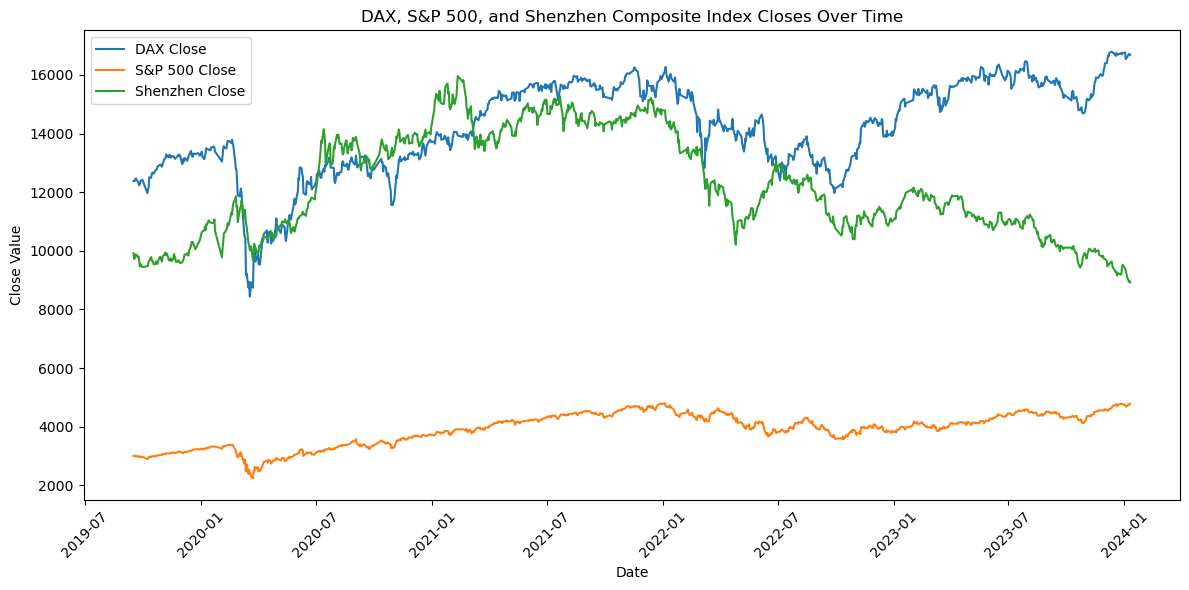

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 6))

# Plotting the 'close_dax' column
plt.plot(final_merged_df['date'], final_merged_df['close_dax'],
         label='DAX Close')

# Plotting the 'close_sp500' column
plt.plot(final_merged_df['date'], final_merged_df['close_sp500'],
         label='S&P 500 Close')

# Plotting the 'close_shenzhen' column
plt.plot(final_merged_df['date'], final_merged_df['close_shenzhen'],
         label='Shenzhen Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('DAX, S&P 500, and Shenzhen Composite Index Closes Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Specifically look at time during COVID

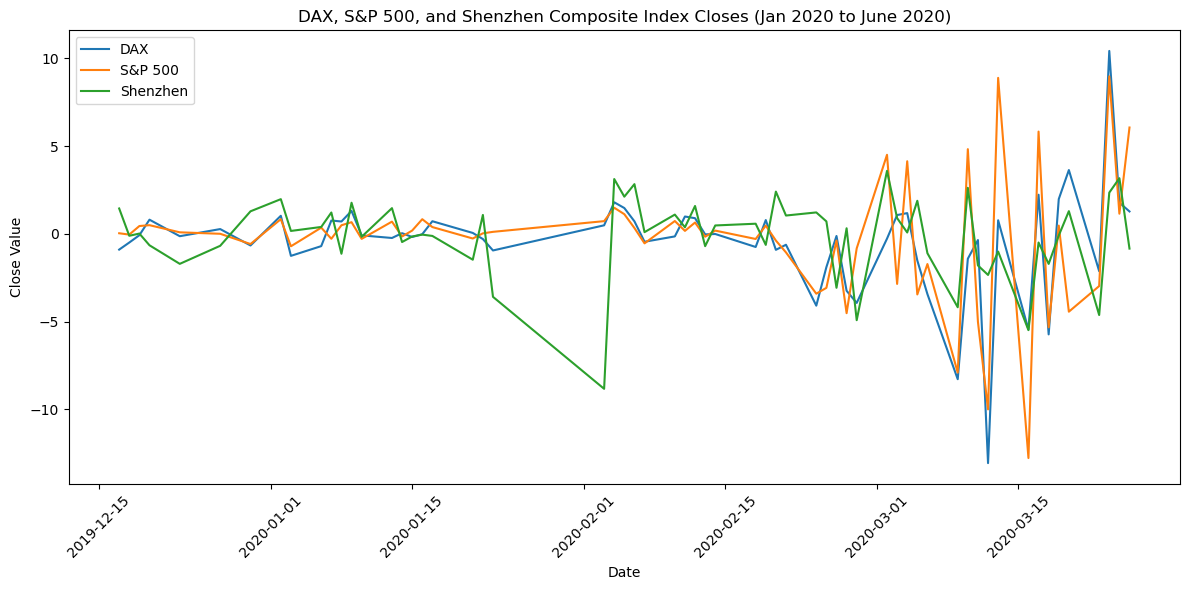

In [26]:
# Filter data for January 2020 to June 2020
filtered_df = final_merged_df[60:120]

plt.figure(figsize=(12, 6))

# Plotting the 'close_dax' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_dax'],
         label='DAX')

# Plotting the 'close_sp500' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_sp500'],
         label='S&P 500')

# Plotting the 'close_shenzhen' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_shenzhen'],
         label='Shenzhen')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('DAX, S&P 500, and Shenzhen Composite Index Closes (Jan 2020 to June 2020)')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Analyse zeigt: Sind alle gleichzeitig eingebrochen --> nicht relevant 
--> Weitere Merkmale suchen

Allerdings: Gleiche Volatilität, S&P500 Volatility vorhanden --> nutzen

In [38]:
def get_us_volatility_data():

    msft = yf.Ticker("^VIX")
    vol_data = msft.history(period="max")

    return vol_data

us_vol_data = get_us_volatility_data()[['Close']].rename(columns={'Close': 'us_volatility'})
us_vol_data['date'] = us_vol_data.index.date

if 'date' not in daxdata.columns: 
    daxdata['date'] = daxdata.index.date

merged = pd.merge(daxdata, us_vol_data, how='left', on = 'date').set_index('date')

# calculate weekly means 
merged['weekly_mean_vol'] = merged['us_volatility'].rolling(
        window=5).mean()

# store weekly means and close-to-close-volatility for every week starting by wednesday
volatilityvalue = np.nan
merged['weekday'] = daxdata.index.weekday

for index, row in merged.iterrows():
    if row['weekday'] == 2:
        volatilityvalue = row['weekly_mean_vol']
    merged.loc[index, 'volatility_weekly'] = volatilityvalue

merged = merged[7:].drop(columns=['us_volatility','weekly_mean_vol', 'weekday'])
merged

,LogRet1_dax,close_dax,volatility_weekly
date,,,
2019-09-25,-0.594678,12234.179688,15.458
2019-09-26,0.443348,12288.540039,15.458
2019-09-27,0.749110,12380.940430,15.458
2019-09-30,0.380021,12428.080078,15.458
2019-10-01,-1.330415,12263.830078,15.458
...,...,...,...
2024-01-04,0.475928,16617.289062,12.918
2024-01-05,-0.138977,16594.210938,12.918
2024-01-08,0.734061,16716.470703,12.918


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


def merge_unemployment_rate(daxdata):

    print('update unemployment rate on: https://statistik.arbeitsagentur.de/DE/Navigation/Statistiken/Interaktive-Statistiken/Zeitreihen/Lange-Zeitreihen-Nav.html')
    unemployment_rate = pd.read_csv(
        'C:/Users/Maria/Documents/Studium/Pyhton Projekte/PTSFC/dax/help_functions/unemployment/unemployment_rate.csv')
    unemployment_rate['rate'] = unemployment_rate['rate'].str.replace(
        ',', '.').astype(float)

    # predict missing montly rate based on AR(3) model
    unemployment_rate['Lag1'] = unemployment_rate['rate'].shift(1)
    unemployment_rate['Lag2'] = unemployment_rate['rate'].shift(2)
    unemployment_rate['Lag3'] = unemployment_rate['rate'].shift(3)

    # train model with all values not containing nans
    bool_series = unemployment_rate['rate'].isna()
    first_index = bool_series.idxmax()
    unemployment_rate_model = unemployment_rate[3:first_index]

    # get data
    X_lags_ext = sm.add_constant(
        unemployment_rate_model.loc[:, 'Lag1':'Lag3'])
    y_index_ext = np.array(unemployment_rate_model.loc[:, 'rate'])

    # AR model (using OLS)
    model = sm.OLS(y_index_ext, X_lags_ext).fit()

    # Get the beta coefficients
    betas = np.array(model.params)

    # predict future prod indexes
    X_array = np.array([1, unemployment_rate.at[first_index, 'Lag1'], unemployment_rate.at[first_index, 'Lag2'],
                        unemployment_rate.at[first_index, 'Lag3']])
    lag1, lag2 = np.nan, np.nan

    for idx, row in unemployment_rate[first_index:].iterrows():
        # predict and safe
        index_pred = betas.dot(X_array)
        unemployment_rate.at[idx, 'rate'] = index_pred

        # update data for next iteration
        lag1, lag2 = X_array[1], X_array[2]
        X_array[2], X_array[3] = lag1, lag2  # shift backwards
        X_array[1] = index_pred

    daxdata['year'] = daxdata.index.year
    daxdata['month'] = daxdata.index.month
    daxdata = daxdata.reset_index()

    merged = pd.merge(daxdata, unemployment_rate, how='left', left_on=['year', 'month'], right_on=[
                      'year', 'month']).set_index('Date').drop(columns={'year', 'month', 'Lag1', 'Lag2',
                                                                             'Lag3'})

    return merged, model.rsquared_adj

In [27]:
from dax.help_functions.unemployment.get_rate import merge_unemployment_rate
daxdata = get_prepared_data()
new_frame = merge_unemployment_rate(daxdata)

update unemployment rate on: https://statistik.arbeitsagentur.de/DE/Navigation/Statistiken/Interaktive-Statistiken/Zeitreihen/Lange-Zeitreihen-Nav.html


In [31]:
new_frame[0].corr()

,Close,LogRetLag1,LogRetLag2,LogRetLag3,LogRetLag4,LogRetLag5,rate
Close,1.000000,0.056675,0.079191,0.097554,0.111769,0.124599,-0.021692
LogRetLag1,0.056675,1.000000,0.698188,0.599479,0.516187,0.468992,0.044867
LogRetLag2,0.079191,0.698188,1.000000,0.819428,0.728691,0.654786,0.064848
LogRetLag3,0.097554,0.599479,0.819428,1.000000,0.871099,0.796051,0.079634
LogRetLag4,0.111769,0.516187,0.728691,0.871099,1.000000,0.900982,0.091516
LogRetLag5,0.124599,0.468992,0.654786,0.796051,0.900982,1.000000,0.103948
rate,-0.021692,0.044867,0.064848,0.079634,0.091516,0.103948,1.000000


Korrelation auch sehr marginal --> einfach weglassen: Test durch Quantile Regression und schauen ob Score besser

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from dax.help_functions.get_dax_data import get_prepared_data
from evaluation.help_functions.prepare_data import next_working_days
from dax.help_functions.unemployment.get_rate import merge_unemployment_rate


def get_QuantRegUnempl_forecasts(daxdata=pd.DataFrame(), quantiles=[0.025, 0.25, 0.5, 0.75, 0.975]):

    if daxdata.empty:
        daxdata = get_prepared_data()

    # add unemployment data
    daxdata = merge_unemployment_rate(daxdata)[0]

    column_names = [f'q{q}' for q in [0.025, 0.25, 0.5, 0.75, 0.975]]
    start_date_dates = max(daxdata.index).strftime('%Y-%m-%d')
    dates = next_working_days(start_date_dates, 5)
    quantile_df = pd.DataFrame(index=dates, columns=column_names)

    for h in range(1, 6):

        name = f'LogRetLag{h}'
        X = pd.DataFrame(daxdata.iloc[:-h][[name, 'rate']].copy())
        X.insert(0, column='intercept', value=np.ones(shape=(len(daxdata)-h)))

        Y = daxdata[[name]].shift(-h).iloc[:-h].copy()
        Y = Y.rename(columns={name: f"lr{h}daysahead"})
        model_qr_temp = sm.QuantReg(endog=Y, exog=X)

        R_t = pd.DataFrame(daxdata.iloc[-1:][[name, 'rate']].copy())
        R_t.insert(0, column='intercept', value=1)

        for q in quantiles:
            model_quantile = model_qr_temp.fit(q=q)
            # Calculate forecasts for R_t using the fitted model for the current quantile
            forecast_temp = model_quantile.predict(R_t)
            quantile_df.loc[dates[h-1]][f'q{q}'] = forecast_temp[0]

    date_st = daxdata.index[-1].strftime('%Y-%m-%d')
    quantile_df.insert(0, 'forecast_date', date_st)
    quantile_df.insert(1, 'target', 'DAX')
    quantile_df.insert(
        2, "horizon", [str(i) + " day" for i in (1, 2, 5, 6, 7)])
    quantile_df.index.name = "date_time"

    return quantile_df

In [20]:
get_QuantRegUnempl_forecasts()

#max(daxdata.index)

update unemployment rate on: https://statistik.arbeitsagentur.de/DE/Navigation/Statistiken/Interaktive-Statistiken/Zeitreihen/Lange-Zeitreihen-Nav.html
                                  Close  LogRetLag1  LogRetLag2  LogRetLag3  \
Date                                                                          
2019-09-10 00:00:00+02:00  12268.709961    0.347914    0.629422    1.163586   
2019-09-11 00:00:00+02:00  12359.070312    0.733812    1.081725    1.363234   
2019-09-12 00:00:00+02:00  12410.250000    0.413251    1.147063    1.494977   
2019-09-13 00:00:00+02:00  12468.530273    0.468515    0.881766    1.615578   
2019-09-16 00:00:00+02:00  12380.309570   -0.710062   -0.241547    0.171704   
...                                 ...         ...         ...         ...   
2024-01-04 00:00:00+01:00  16617.289062    0.475928   -0.910971   -0.805254   
2024-01-05 00:00:00+01:00  16594.210938   -0.138977    0.336951   -1.049948   
2024-01-08 00:00:00+01:00  16716.470703    0.734061    0.5

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
date_time,,,,,,,,
2024-01-11,2024-01-10,DAX,1 day,-2.899102,-0.497137,0.073117,0.706232,2.667871
2024-01-12,2024-01-10,DAX,2 day,-4.20349,-0.701082,0.127541,1.013235,3.519122
2024-01-15,2024-01-10,DAX,5 day,-4.252134,-0.819754,0.167643,1.194385,4.930061
2024-01-16,2024-01-10,DAX,6 day,-5.214398,-0.934947,0.22567,1.470394,5.520895
2024-01-17,2024-01-10,DAX,7 day,-5.957453,-0.872543,0.355392,1.583555,5.620161
